In [54]:
import pandas as pd
import jutil
import matplotlib.pyplot as plt

In [14]:
sql = "select course_code,course_name,teach_class_id,pmark as mark ,teacher,grade \
from view_stu_course_mark where course_code='0473004'"
df = jutil.load_pd_df(sql)
df.head()

,course_code,course_name,grade,mark,teach_class_id,teacher
0,0473004,嵌入式系统设计与应用实验,2007,66.0,1,杨斌
1,0473004,嵌入式系统设计与应用实验,2007,72.0,1,杨斌
2,0473004,嵌入式系统设计与应用实验,2007,84.0,1,杨斌
3,0473004,嵌入式系统设计与应用实验,2007,76.0,1,杨斌
4,0473004,嵌入式系统设计与应用实验,2007,74.0,1,杨斌


In [15]:
df.count()

course_code       864
course_name       864
grade             864
mark              864
teach_class_id    864
teacher           864
dtype: int64

In [52]:
g = df.groupby('grade')
keys = g.grade.all().values
year_mean_mark = g.agg({'mark':'mean'})
marks = year_mean_mark['mark'].values
marks

array([ 72.94666667,  76.25      ,  73.35185185,  78.2826087 ,
        68.625     ,  72.08571429,  67.67934783,  76.63571429,  73.67924528])

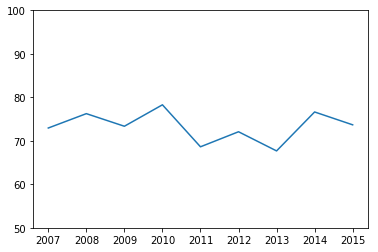

In [56]:

plt.plot(keys,marks)
plt.ylim((50,100))
plt.show()

In [85]:
# 计算挂科率
def get_group_key_value(g):
    keys = list(g.groups.keys())
    count = g.agg({'mark':'count'})
    values = list(count['mark'].values)
    d = {}
    for i in range(len(keys)):
        d[keys[i]] = values[i]
    return d

In [87]:
fail_cnt = get_group_key_value(df[df.mark<60.0].groupby('grade'))
fail_cnt

{'2007': 4, '2009': 2, '2011': 21, '2012': 22, '2013': 26}

In [89]:
normal_cnt = get_group_key_value(df.groupby('grade'))
normal_cnt

{'2007': 75,
 '2008': 44,
 '2009': 54,
 '2010': 46,
 '2011': 128,
 '2012': 140,
 '2013': 184,
 '2014': 140,
 '2015': 53}

In [90]:
hang_rate = {}
for k in normal_cnt.keys():
    hang_rate[k] = fail_cnt.get(k,0)/normal_cnt[k]
hang_rate

{'2007': 0.053333333333333337,
 '2008': 0.0,
 '2009': 0.037037037037037035,
 '2010': 0.0,
 '2011': 0.1640625,
 '2012': 0.15714285714285714,
 '2013': 0.14130434782608695,
 '2014': 0.0,
 '2015': 0.0}

In [93]:
hang_rate.values()

dict_values([0.053333333333333337, 0.0, 0.037037037037037035, 0.0, 0.1640625, 0.15714285714285714, 0.14130434782608695, 0.0, 0.0])

In [94]:
# 求出课程分数波动性,即方差或标准差


In [ ]:
# 如何根据上述信息确定课程难度?

